In [ ]:
from ultralytics import RTDETR, YOLO
import csv
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [ ]:
model = YOLO('yolo11x.pt')

p_input_folder = "../Images/Pedestrians"
np_input_folder = "../Images/No_Pedestrians"


p_csv_path = f"../Results/yolo11n_p_results.csv"
np_csv_path = f"../Results/yolo11n_np_results.csv"

PERSON_CLASS_ID = 0

p_results_list = []
np_results_list = []

for img_name in os.listdir(p_input_folder):
    if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(p_input_folder, img_name)
        
        p_results = model(img_path, verbose=False)
        
        pedestrian_detected = any(
            int(box.cls[0]) == PERSON_CLASS_ID
            for r in p_results
            for box in r.boxes
        )
        
        p_results_list.append([img_name, "YES" if pedestrian_detected else "NO"])

with open(p_csv_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["image_name", "pedestrian_detected"])
    writer.writerows(p_results_list)

for img_name in os.listdir(np_input_folder):
    if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(np_input_folder, img_name)
        
        np_results = model(img_path, verbose=False)
        
        pedestrian_detected = any(
            int(box.cls[0]) == PERSON_CLASS_ID
            for r in np_results
            for box in r.boxes
        )
        
        np_results_list.append([img_name, "YES" if pedestrian_detected else "NO"])

with open(np_csv_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["image_name", "pedestrian_detected"])
    writer.writerows(np_results_list)


In [ ]:
model = RTDETR('rtdetr-x.pt')

input_folder = "../Images/Pedestrians"

np_csv_path = f"../Results/rtdetr-x_p_results.csv"

output_folder = "Pedestrians_Results_Images"
os.makedirs(output_folder, exist_ok=True)

PERSON_CLASS_ID = 0

results_list = []

for img_name in os.listdir(input_folder):
    if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(input_folder, img_name)
        
        results = model(img_path, verbose=False)
        
        image = cv2.imread(img_path)
        
        pedestrian_detected = False
        
        for r in results:
            for box in r.boxes:
                if int(box.cls[0]) == PERSON_CLASS_ID:
                    pedestrian_detected = True
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf = float(box.conf[0])
                    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    cv2.putText(image, f"Pedestrian {conf:.2f}",
                                (x1, y1 - 10),
                                cv2.FONT_HERSHEY_SIMPLEX,
                                0.6, (0, 255, 0), 2)
        
        status = "YES" if pedestrian_detected else "NO"
        
        save_path = os.path.join(output_folder, img_name)
        cv2.imwrite(save_path, image)
        
        results_list.append([img_name, status])

with open(np_csv_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["image_name", "pedestrian_detected"])
    writer.writerows(results_list)

print(f"Results saved to {np_csv_path}")
print(f"Images saved to '{output_folder}'")

Results saved to ../Results/rtdetr-x_p_results.csv
Images saved to 'Pedestrians_Results_Images'


In [ ]:
df1 = pd.read_csv("../Results/YOLO11x/yolo11x_p_results.csv")
df2 = pd.read_csv("../Results/YOLO11x/yolo11x_np_results.csv")

print(df1.groupby(["pedestrian_detected"]).count())
print(df2.groupby(["pedestrian_detected"]).count())

df3 = pd.read_csv("../Results/YOLO11n/yolo11n_p_results.csv")
df4 = pd.read_csv("../Results/YOLO11n/yolo11n_np_results.csv")

print(df3.groupby(["pedestrian_detected"]).count())
print(df4.groupby(["pedestrian_detected"]).count())

df5 = pd.read_csv("../Results/YOLOv8x/yolov8x_p_results.csv")
df6 = pd.read_csv("../Results/YOLOv8x/yolov8x_np_results.csv")

print(df5.groupby(["pedestrian_detected"]).count())
print(df6.groupby(["pedestrian_detected"]).count())

df7 = pd.read_csv("../Results/YOLOv8n/yolov8n_p_results.csv")
df8 = pd.read_csv("../Results/YOLOv8n/yolov8n_np_results.csv")

print(df7.groupby(["pedestrian_detected"]).count())
print(df8.groupby(["pedestrian_detected"]).count())

                     image_name
pedestrian_detected            
NO                           30
YES                          70
                     image_name
pedestrian_detected            
NO                           93
YES                           7
                     image_name
pedestrian_detected            
NO                           23
YES                          77
                     image_name
pedestrian_detected            
NO                           91
YES                           9
                     image_name
pedestrian_detected            
NO                           38
YES                          62
                     image_name
pedestrian_detected            
NO                           88
YES                          12


In [ ]:
def combine_model_results(file_np, file_p, model_name):
    # Load both files
    df_np = pd.read_csv(file_np)
    df_p = pd.read_csv(file_p)

    df_np["correct"] = df_np["pedestrian_detected"] == "NO"
    df_p["correct"] = df_p["pedestrian_detected"] == "YES"

    df_np["model"] = model_name
    df_p["model"] = model_name

    # Combine them
    df_combined = pd.concat([df_np, df_p], ignore_index=True)
    return df_combined

df_yolo11n = combine_model_results("../Results/YOLO11n/yolo11n_np_results.csv", "../Results/YOLO11n/yolo11n_p_results.csv", "yolo11n")
df_yolo11x = combine_model_results("../Results/YOLO11x/yolo11x_np_results.csv", "../Results/YOLO11n/yolo11n_p_results.csv", "yolo11x")
df_yolov8n = combine_model_results("../Results/YOLOv8n/yolov8n_np_results.csv", "../Results/YOLOv8n/yolov8n_p_results.csv", "yolov8n")
df_yolov8x = combine_model_results("../Results/YOLOv8x/yolov8x_np_results.csv", "../Results/YOLOv8x/yolov8x_p_results.csv", "yolov8x")
df_rtdetrx = combine_model_results("../Results/RTDETR-X/rtdetr-x_np_results.csv", "../Results/RTDETR-X/rtdetr-x_p_results.csv", "rtdetr-x")

df_all = pd.concat([df_yolo11n, df_yolo11x, df_yolov8n, df_yolov8x, df_rtdetrx], ignore_index=True)

df_all.to_csv("../Results/ML_Results.csv", index=False)

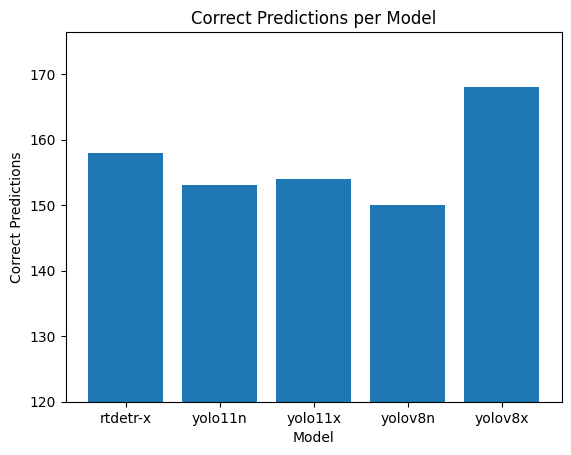

In [50]:
correct_counts = df_all.groupby("model")["correct"].sum()
total_counts = df_all.groupby("model")["correct"].count()

plt.bar(correct_counts.index, correct_counts.values)
plt.ylim(120, None)
plt.xlabel("Model")
plt.ylabel("Correct Predictions")
plt.title("Correct Predictions per Model")
plt.show()
